<a href="https://colab.research.google.com/github/ChamikaRohan/Machine-Learning-based-Red-Wine-Quality-Prediction/blob/main/Red_Wine_Quality_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Exploration and Visualization

## Importing the libraries

In [ ]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV,cross_val_score

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

## Loading Dataset

In [ ]:
dataset = pd.read_csv('winequality-red.csv')

## Exploration through dataset

In [ ]:
#Checking the dataset size

print("Dataset shape: ", dataset.shape)

Dataset shape:  (1599, 12)


In [ ]:
#Checking the data distribution

dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
#Getting the information about dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
#Getting statistical summary of the numerical columns in the dataset

dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Plotting Graphs for better insight to data distribution

### Target variable(Quality) distribution

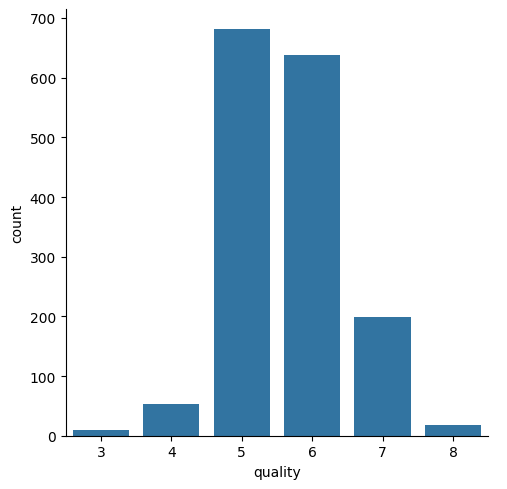

In [ ]:
sns.catplot(x='quality', data=dataset, kind='count')
plt.show()

### Feature Comparison with Target Variable

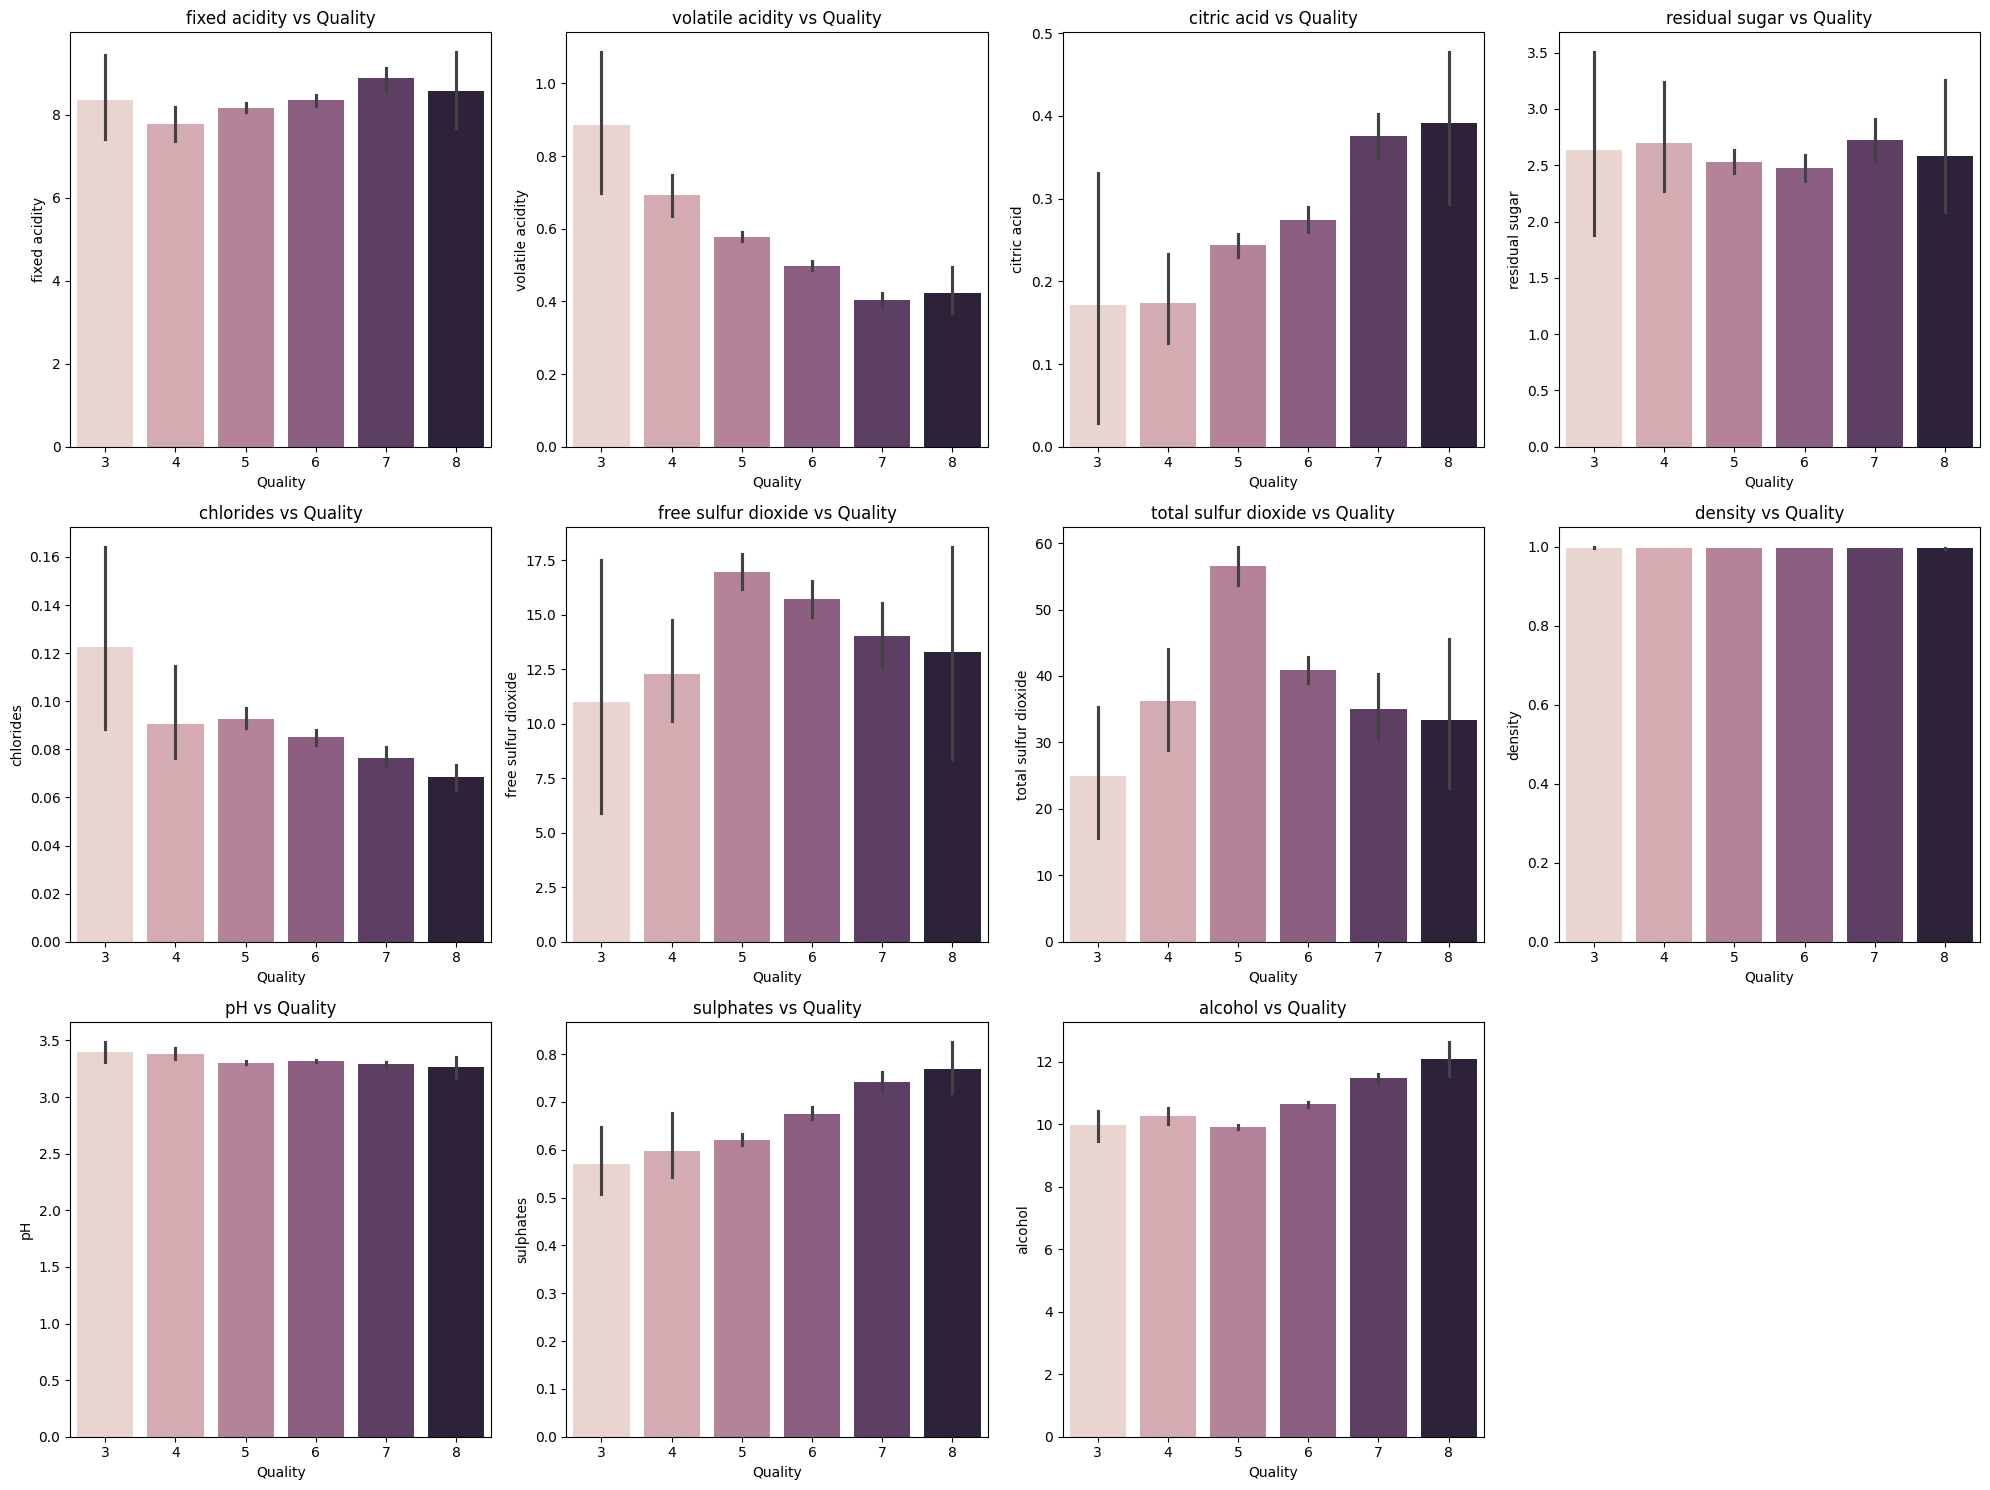

In [ ]:
#List of features (excluding 'quality' which is the target)
features = dataset.columns.drop('quality')

#Setting up the figure with appropriate size
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))

#Flatten the axes array for easier iteration
axes = axes.flatten()

#This loop goes through each feature and create the seperate bar plots for each feature
for i, feature in enumerate(features):
    sns.barplot(x='quality', y=feature, data=dataset, hue='quality', ax=axes[i], dodge=False)
    axes[i].set_title(f'{feature} vs Quality')
    axes[i].set_xlabel('Quality')
    axes[i].set_ylabel(feature)
    axes[i].legend_.remove()

#Remove the last subplot if the number of features is odd
if len(features) % 2 != 0:
    fig.delaxes(axes[-1])

#Adjust layout and show the plots
plt.tight_layout()
plt.show()


##Standard Normal Distribution Plots

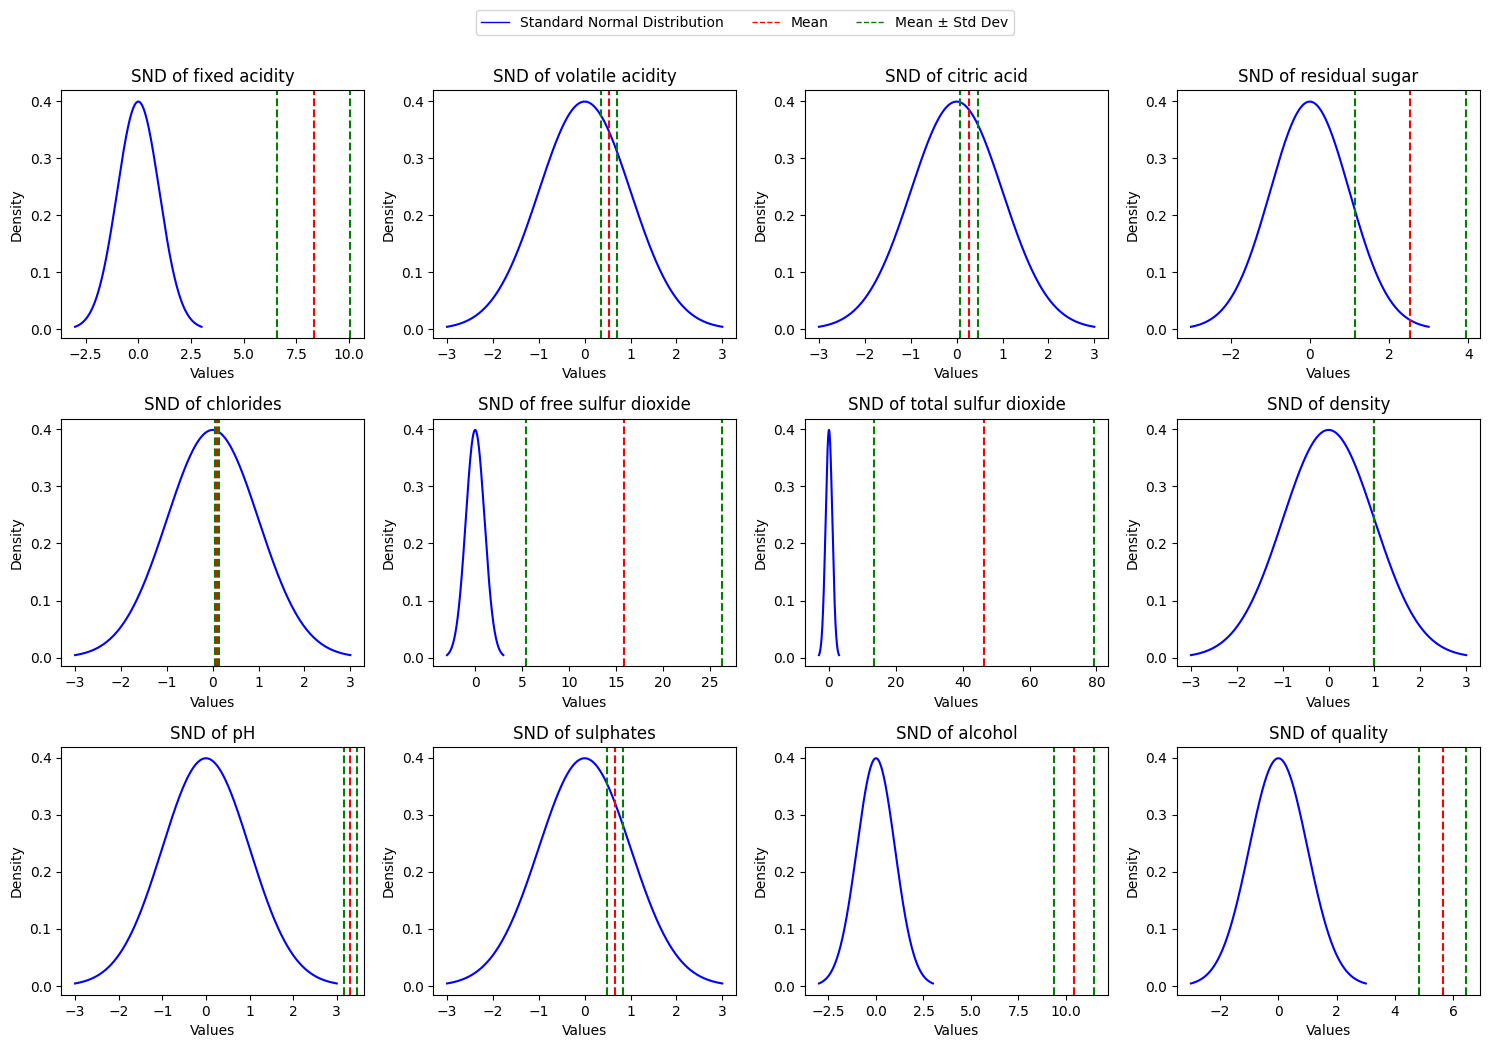

In [ ]:
# Create a figure and axes for each feature
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
axes = axes.flatten()

# Generate x-values for the standard normal distribution
x = np.linspace(-3, 3, 1000)

# Create a single legend for all plots
legend_labels = ['Standard Normal Distribution', 'Mean', 'Mean ± Std Dev']
handles = [plt.Line2D([0], [0], color='blue', linewidth=1, linestyle='-'),
           plt.Line2D([0], [0], color='red', linewidth=1, linestyle='--'),
           plt.Line2D([0], [0], color='green', linewidth=1, linestyle='--')]
fig.legend(handles, legend_labels, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3)

# Iterate through each feature and plot the standard normal distribution
for i, (col, ax) in enumerate(zip(dataset.columns, axes)):
    # Calculate mean and standard deviation of the feature
    mean = dataset[col].mean()
    std = dataset[col].std()

    # Plot the standard normal distribution curve
    ax.plot(x, norm.pdf(x, 0, 1), color='blue')

    # Highlight the feature's distribution (mean and std)
    ax.axvline(mean, color='red', linestyle='--')
    ax.axvline(mean - std, color='green', linestyle='--')
    ax.axvline(mean + std, color='green', linestyle='--')

    # Title and labels
    ax.set_title(f'SND of {col}')
    ax.set_xlabel('Values')
    ax.set_ylabel('Density')

# Adjust layout and display
plt.tight_layout()
plt.show()


#Pre-processing data

## Handling Null Values/Missing Values

In [ ]:
#Check for null/missing values in each column
missing_values = dataset.isnull().sum()

#Print the number of null/missing values in each column
print("Missing values in each column: \n")
print(missing_values)

#Total null/missing values in the dataset
total_missing = missing_values.sum()
print("\nTotal Missing Values in the Dataset:", total_missing)

Missing values in each column: 

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Total Missing Values in the Dataset: 0


## Handling Duplicate values

In [ ]:
#Check for duplicate rows
duplicates = dataset[dataset.duplicated()]

#Display duplicate rows
print("Duplicate Rows:")
print(duplicates)

Duplicate Rows:
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4               7.4             0.700         0.00            1.90      0.076   
11              7.5             0.500         0.36            6.10      0.071   
27              7.9             0.430         0.21            1.60      0.106   
40              7.3             0.450         0.36            5.90      0.074   
65              7.2             0.725         0.05            4.65      0.086   
...             ...               ...          ...             ...        ...   
1563            7.2             0.695         0.13            2.00      0.076   
1564            7.2             0.695         0.13            2.00      0.076   
1567            7.2             0.695         0.13            2.00      0.076   
1581            6.2             0.560         0.09            1.70      0.053   
1596            6.3             0.510         0.13            2.30      0.076   

      free 

In [ ]:
#Remove duplicate rows while keeping the first occurrence of that data row
dataset.drop_duplicates(inplace=True)

In [ ]:
#Now Checking the dataset size

print("Dataset shape: ", dataset.shape)

Dataset shape:  (1359, 12)


## Handling Categorical Variables

In [ ]:
dataset['quality'].value_counts()

quality
5    577
6    535
7    167
4     53
8     17
3     10
Name: count, dtype: int64

In [ ]:
#classifying wine qulaity as good or bad using target variable
#'Bad' or 0 if quality < 5.5
#'Good' or 1 if quality >= 5.5

dataset['quality' ]= dataset['quality'].apply(lambda x:1 if x>5.5 else 0)
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0


quality
1    719
0    640
Name: count, dtype: int64


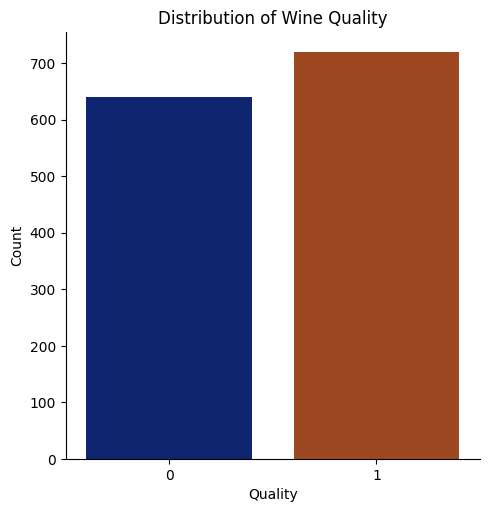

In [ ]:
print(dataset['quality'].value_counts())

#Countplot for 'quality' column
sns.catplot(x='quality', data=dataset, kind='count', hue='quality', palette='dark', legend=False)

#Set labels and title
plt.xlabel('Quality')
plt.ylabel('Count')
plt.title('Distribution of Wine Quality')

#Displaying the plot
plt.show()


## Handling Outliers

### Detecting Outliers

#### Box-plots

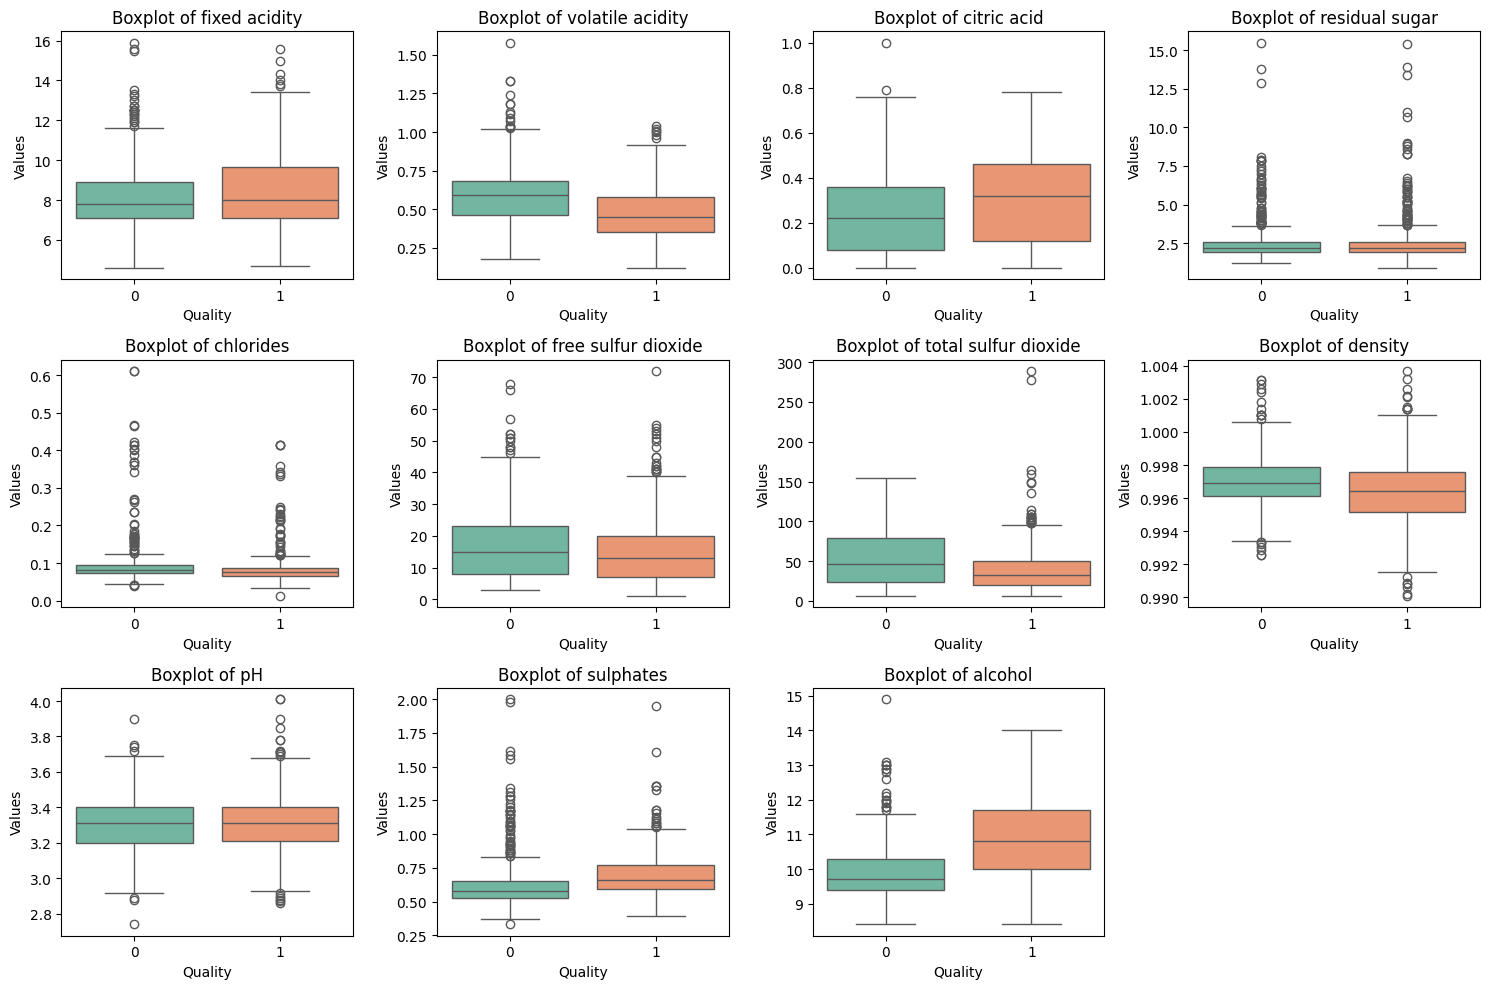

In [ ]:
#Here creating a grid of subplots for each feature
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))

#Flatten the axes array
axes = axes.flatten()

#Loop through each feature (excluding the last 'quality' column) and create boxplot for each feature
for i, col in enumerate(dataset.columns[:-1]):  # Exclude the last column 'quality'
    sns.boxplot(x='quality', y=col, data=dataset, ax=axes[i], palette='Set2', hue='quality', legend=False)
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel('Quality')
    axes[i].set_ylabel('Values')

# Remove the last subplot 'quality'
fig.delaxes(axes[-1])

#Adjust layout and display the box plots
plt.tight_layout()
plt.show()

#### Using Z-Scores

In [ ]:
# Calculate Z-scores for each column in the dataset
z_scores = (dataset - dataset.mean()) / dataset.std()

z_scores

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.524238,0.931657,-1.392745,-0.460987,-0.245532,-0.468381,-0.383908,0.583788,1.291397,-0.578348,-0.954023,-1.059533
1,-0.293955,1.915095,-1.392745,0.056644,0.200020,0.871682,0.603851,0.048719,-0.708135,0.124776,-0.584360,-1.059533
2,-0.293955,1.259470,-1.188180,-0.165198,0.078506,-0.085506,0.214734,0.155733,-0.321129,-0.051005,-0.584360,-1.059533
3,1.663455,-1.363032,1.471170,-0.460987,-0.265785,0.105932,0.394326,0.690802,-0.966139,-0.461161,-0.584360,0.943117
5,-0.524238,0.713115,-1.392745,-0.534935,-0.265785,-0.276944,-0.204316,0.583788,1.291397,-0.578348,-0.954023,-1.059533
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,-0.869663,0.494574,-0.983615,-0.460987,-0.407552,1.158838,-0.264180,-0.106451,0.710888,0.945087,-0.861607,0.943117
1594,-1.215088,0.385303,-0.983615,-0.387040,0.038001,1.541713,-0.084587,-0.967912,0.904391,-0.461161,0.062551,-1.059533
1595,-1.387801,0.112125,-0.881332,-0.239145,-0.529066,2.211745,0.124937,-0.850197,1.355898,0.593525,0.709462,0.943117
1597,-1.387801,0.631162,-0.779049,-0.387040,-0.265785,1.541713,-0.084587,-0.662923,1.678403,0.300557,-0.214696,-1.059533


In [ ]:
#Define threshold for outliers (3 standard deviations from the mean)
threshold = 3

#Find and display outliers
outliers = (np.abs(z_scores) > threshold).any(axis=1)
outliers_indices = outliers[outliers].index

print("Outliers Detected:")
print(outliers_indices)

Outliers Detected:
Index([  13,   14,   15,   17,   19,   33,   38,   42,   43,   45,
       ...
       1321, 1358, 1367, 1370, 1374, 1434, 1474, 1558, 1574, 1589],
      dtype='int64', length=120)


In [ ]:
#Remove outliers from the dataset
dataset_no_outliers = dataset[~outliers]

#Print the shape of the original and outlier-removed datasets
print("\nOriginal Dataset Shape:", dataset.shape)
print("Dataset Shape after Removing Outliers:", dataset_no_outliers.shape)

dataset = dataset_no_outliers


Original Dataset Shape: (1359, 12)
Dataset Shape after Removing Outliers: (1239, 12)


## Train Test Split

### Create x and y from dataset

In [ ]:
x = dataset.drop('quality',axis=1)
y = dataset['quality']

In [ ]:
#Now let's plot the x
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4


In [ ]:
#Now let's plot the y
y.head()

0    0
1    0
2    0
3    1
5    0
Name: quality, dtype: int64

### Split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=43)

In [ ]:
print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (991, 11)
x_test shape:  (248, 11)
y_train shape:  (991,)
y_test shape:  (248,)


## Feature Scaling

### Standardization

In [ ]:
sc=StandardScaler()

x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [ ]:
#Cheking x_train after appplied standard scaller
x_train

array([[-0.92670677,  2.23139285,  0.11627409, ...,  1.54510221,
        -0.80165302,  0.67306399],
       [-0.19014769, -0.26710062,  0.37602979, ..., -0.24059109,
         0.14382528,  1.93664052],
       [ 0.6077913 , -0.15222736,  0.47993206, ..., -0.31201882,
         1.01051373,  0.3814694 ],
       ...,
       [ 0.85331099, -1.18608672,  1.41505256, ..., -0.24059109,
         1.40446302, -0.78490893],
       [ 2.2036693 ,  0.30726569,  2.03846623, ..., -1.88342893,
        -0.6440733 , -0.39611615],
       [ 2.2036693 ,  0.96778695,  1.36310142, ..., -1.02629614,
         1.56204274,  1.74224413]])

In [ ]:
#Checking x_test after appplied standard scaller
x_test

array([[-0.34244394,  2.87847215, -0.59524401, ..., -0.57889243,
        -1.15771118, -0.4469619 ],
       [ 2.43254084, -0.8397093 ,  1.83450111, ..., -1.48094616,
         0.61809518,  0.01936772],
       [ 0.92942409,  1.30196322, -0.37926667, ..., -1.20339117,
        -0.6604854 , -1.00655745],
       ...,
       [ 0.46692662,  1.56967228, -1.40515905, ...,  0.32316131,
         1.54151449, -1.00655745],
       [-0.4580683 , -0.7207275 , -0.433261  , ...,  0.18438381,
        -0.44738864, -1.00655745],
       [ 1.33410937, -1.25614562,  1.24056341, ..., -1.20339117,
        -0.94461442, -0.63349375]])

## Feature Selection

### Correlation Matrix

#### Correlation Matrix Generation

In [ ]:
corr = dataset.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.295214,0.694900,0.178596,0.161180,-0.129192,-0.090289,0.659316,-0.708471,0.206067,-0.021713,0.112606
volatile acidity,-0.295214,1.000000,-0.586277,0.042038,0.079047,-0.000112,0.107727,0.009798,0.263937,-0.341434,-0.216562,-0.308273
citric acid,0.694900,-0.586277,1.000000,0.167597,0.099672,-0.058634,0.015058,0.359234,-0.527456,0.314609,0.161903,0.180635
residual sugar,0.178596,0.042038,0.167597,1.000000,0.098867,-0.010233,0.070850,0.329232,-0.076026,0.044924,0.161289,0.012046
chlorides,0.161180,0.079047,0.099672,0.098867,1.000000,-0.049311,0.059787,0.303134,-0.181430,0.044450,-0.211516,-0.106747
free sulfur dioxide,-0.129192,-0.000112,-0.058634,-0.010233,-0.049311,1.000000,0.654391,-0.027018,0.083310,0.051044,-0.090889,-0.072704
total sulfur dioxide,-0.090289,0.107727,0.015058,0.070850,0.059787,0.654391,1.000000,0.122758,-0.031596,-0.042984,-0.278700,-0.270091
density,0.659316,0.009798,0.359234,0.329232,0.303134,-0.027018,0.122758,1.000000,-0.321350,0.119810,-0.484351,-0.160255
pH,-0.708471,0.263937,-0.527456,-0.076026,-0.181430,0.083310,-0.031596,-0.321350,1.000000,-0.054193,0.140959,-0.025466
sulphates,0.206067,-0.341434,0.314609,0.044924,0.044450,0.051044,-0.042984,0.119810,-0.054193,1.000000,0.248136,0.333645


#### Correlation Matrix as Heatmap

<Axes: >

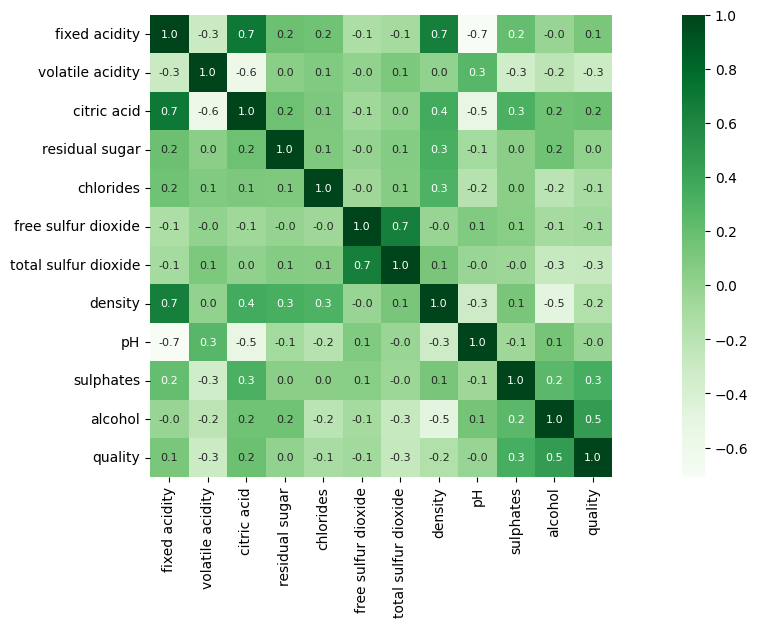

In [ ]:
plt.figure(figsize=(18,6))
sns.heatmap(corr, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Greens')

### Chi-square Test

In [ ]:
#Define features (excluding 'quality' column)
features = dataset.drop('quality', axis=1).columns

#Calculate Chi-square scores
chi2_scores, _ = chi2(dataset[features], dataset['quality'])

#Create a DataFrame to display the results
chi2_result = pd.DataFrame({'Feature': features, 'Chi2 Score': chi2_scores})
chi2_result.sort_values(by='Chi2 Score', ascending=False, inplace=True)
chi2_result.reset_index(drop=True, inplace=True)

#Display the Chi-square test results
print("Chi-square Test Results (Chi2 Scores only):")
print(chi2_result)

Chi-square Test Results (Chi2 Scores only):
                 Feature   Chi2 Score
0   total sulfur dioxide  1838.703101
1    free sulfur dioxide    37.670975
2                alcohol    26.448070
3       volatile acidity     6.701542
4            citric acid     5.545892
5          fixed acidity     5.148324
6              sulphates     3.620372
7              chlorides     0.088847
8         residual sugar     0.051771
9                     pH     0.004810
10               density     0.000094


In [ ]:
# Drop features with Chi2 Score < 1 from the dataset
threshold = 1
selected_features = chi2_result[chi2_result['Chi2 Score'] >= threshold]['Feature'].values

dataset_selected = dataset[selected_features.tolist() + ['quality']]

print(selected_features)
print("\nShape of original dataset:", dataset.shape)
print("Shape of dataset with selected features:", dataset_selected.shape)

['total sulfur dioxide' 'free sulfur dioxide' 'alcohol' 'volatile acidity'
 'citric acid' 'fixed acidity' 'sulphates']

Shape of original dataset: (1239, 12)
Shape of dataset with selected features: (1239, 8)


# Creating Machine Learning Algorithms

## Random Forest Classifier

In [ ]:
#Creating Random Forest Classifier Instance
random_forest_classifier = RandomForestClassifier(n_estimators=100)

In [ ]:
random_forest_classifier.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
RF_train_prediction = random_forest_classifier.predict(x_train)
RF_train_accuracy = accuracy_score(RF_train_prediction, y_train)
print('Train Data Accuracy : ', RF_train_accuracy)

Train Data Accuracy :  1.0


In [ ]:
RF_test_prediction = random_forest_classifier.predict(x_test)
RF_test_accuracy = accuracy_score(RF_test_prediction, y_test)
print('Test Data Accuracy : ', RF_test_accuracy)

Test Data Accuracy :  0.7943548387096774


## Support vector Machine (SVC)

In [ ]:
#Creating Random Support vector Classifier Instance
support_vector_classifier = SVC()

In [ ]:
support_vector_classifier.fit(x_train, y_train)

SVC()

In [ ]:
SVM_train_prediction = support_vector_classifier.predict(x_train)
SVM_train_accuracy = accuracy_score(SVM_train_prediction, y_train)
print('Train Data Accuracy : ', SVM_train_accuracy)

Train Data Accuracy :  0.79313824419778


In [ ]:
SVM_test_prediction = support_vector_classifier.predict(x_test)
SVM_test_accuracy = accuracy_score(SVM_test_prediction, y_test)
print('Test Data Accuracy : ', SVM_test_accuracy)

Test Data Accuracy :  0.7580645161290323


# Tuning Machine Learning algorithm

## Random Forest Classifier

0.7406262626262626

## Support vector Machine (SVC)

SVC Train Data Accuracy :  0.7356205852674067
SVC Test Data Accuracy :  0.7217741935483871


# Evaluation Metrics

## Confusion Metrix

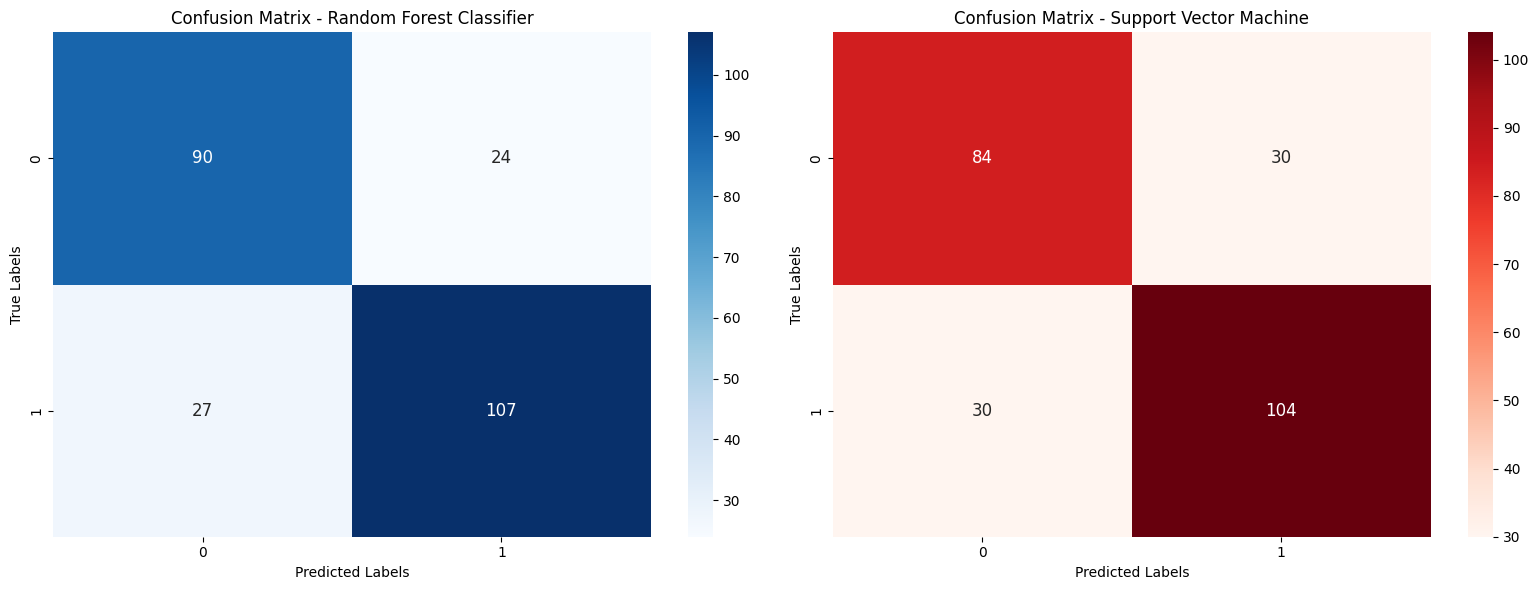

In [ ]:
#Confusion matrix for Random Forest
conf_matrix_RF = confusion_matrix(y_test, RF_test_prediction)

#Confusion matrix for Support Vector Machine
conf_matrix_SVM = confusion_matrix(y_test, SVM_test_prediction)

# Create subplots for both confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

#Plot confusion matrix for Random Forest
sns.heatmap(conf_matrix_RF, annot=True, fmt='d', cmap='Blues', annot_kws={"fontsize":12}, ax=axes[0])
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')
axes[0].set_title('Confusion Matrix - Random Forest Classifier')

#Plot confusion matrix for Support Vector Machine
sns.heatmap(conf_matrix_SVM, annot=True, fmt='d', cmap='Reds', annot_kws={"fontsize":12}, ax=axes[1])
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')
axes[1].set_title('Confusion Matrix - Support Vector Machine')

plt.tight_layout()
plt.show()

##Accuracy

In [ ]:
#Accuracy for Random Forest
accuracy_RF = accuracy_score(y_test, RF_test_prediction)
print("Accuracy - Random Forest:", accuracy_RF)

#Accuracy for Support Vector Machine
accuracy_SVM = accuracy_score(y_test, SVM_test_prediction)
print("Accuracy - Support Vector Machine:", accuracy_SVM)

Accuracy - Random Forest: 0.7943548387096774
Accuracy - Support Vector Machine: 0.7580645161290323


## Precision & Recall

In [ ]:
#Precision for Random Forest
precision_RF = precision_score(y_test, RF_test_prediction)
print("Precision - Random Forest:", precision_RF)

#Precision for Support Vector Machine
precision_SVM = precision_score(y_test, SVM_test_prediction)
print("Precision - Support Vector Machine:", precision_SVM, "\n")

#Recall for Random Forest
recall_RF = recall_score(y_test, RF_test_prediction)
print("Recall - Random Forest:", recall_RF)

#Recall for Support Vector Machine
recall_SVM = recall_score(y_test, SVM_test_prediction)
print("Recall - Support Vector Machine:", recall_SVM)

Precision - Random Forest: 0.816793893129771
Precision - Support Vector Machine: 0.7761194029850746 

Recall - Random Forest: 0.7985074626865671
Recall - Support Vector Machine: 0.7761194029850746


##F1-Score

In [ ]:
#F1-score for Random Forest
f1_RF = f1_score(y_test, RF_test_prediction)
print("F1-Score - Random Forest:", f1_RF)

#F1-score for Support Vector Machine
f1_SVM = f1_score(y_test, SVM_test_prediction)
print("F1-Score - Support Vector Machine:", f1_SVM)

F1-Score - Random Forest: 0.8075471698113207
F1-Score - Support Vector Machine: 0.7761194029850746


##AU-ROC

In [ ]:
#AUROC for Random Forest
auroc_RF = roc_auc_score(y_test, RF_test_prediction)
print("AUROC - Random Forest:", auroc_RF)

#AUROC for Support Vector Machine
auroc_SVM = roc_auc_score(y_test, SVM_test_prediction)
print("AUROC - Support Vector Machine:", auroc_SVM)


AUROC - Random Forest: 0.7939905734485467
AUROC - Support Vector Machine: 0.7564807541241163


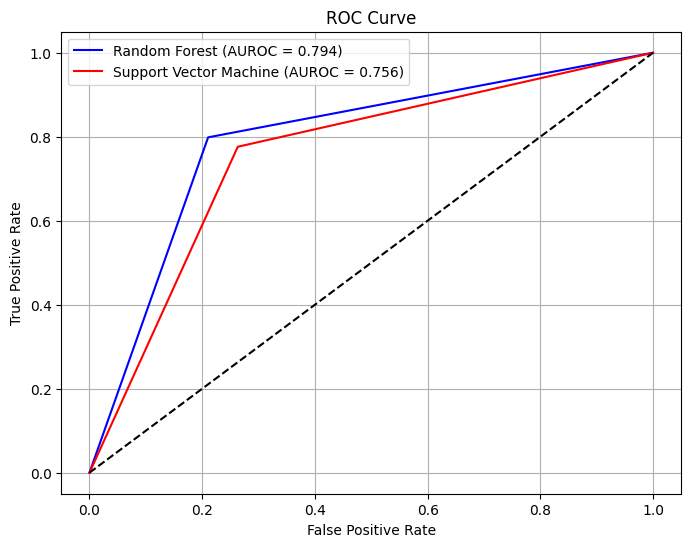

In [ ]:
#Calculate ROC curve for Random Forest
fpr_RF, tpr_RF, _ = roc_curve(y_test, RF_test_prediction)

#Calculate ROC curve for Support Vector Machine
fpr_SVM, tpr_SVM, _ = roc_curve(y_test, SVM_test_prediction)

#Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_RF, tpr_RF, label='Random Forest (AUROC = {:.3f})'.format(auroc_RF), color='blue')
plt.plot(fpr_SVM, tpr_SVM, label='Support Vector Machine (AUROC = {:.3f})'.format(auroc_SVM), color='red')

#Plot ROC curve for random guessing (diagonal line)
plt.plot([0, 1], [0, 1], linestyle='--', color='black')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()